**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [1]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

### Visualizacao dos dados

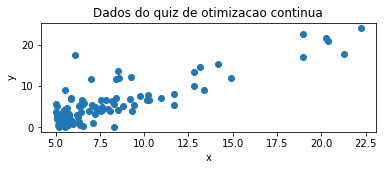

In [2]:
# dataset do Quiz de Otimizacao Continua -- troque para carregar o alegrete.csv
# quiz_data = np.array([
#     [1, 3],
#     [2, 4],
#     [3, 4],
#     [4, 2]
# ])

quiz_data = np.genfromtxt('alegrete.csv', delimiter=',')

#Gráfico dos dados
plt.figure(figsize=(6, 2))
plt.scatter(quiz_data[:,0], quiz_data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados do quiz de otimizacao continua')
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

EQM final: 9.568021564419073


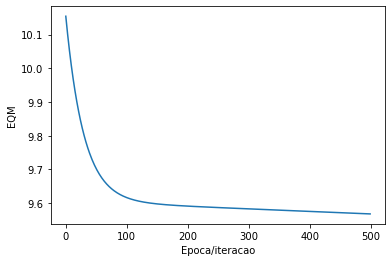

In [3]:
theta_0s, theta_1s = alegrete.fit(
    quiz_data, theta_0=-1, theta_1=1, 
    alpha=0.0001, num_iterations=500
)

# valores finais de theta0 e theta1
final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

mse_list = [alegrete.compute_mse(th0, th1, quiz_data) for th0, th1 in zip(theta_0s, theta_1s)]
print(f"EQM final: {mse_list[-1]}")


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: 0.9227160456192404*x + -1.0514291260404773


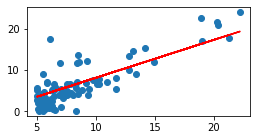

In [4]:
theta_0s, theta_1s = alegrete.fit(
    quiz_data, theta_0=-1, theta_1=1, 
    alpha=0.0001, num_iterations=500
)

# valores finais de theta0 e theta1
final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_th1}*x + {final_th0}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(quiz_data[:,0], quiz_data[:,1])

# plota a curva de ajuste
pred = final_th1*quiz_data[:,0] + final_th0
plt.plot(quiz_data[:,0], pred, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

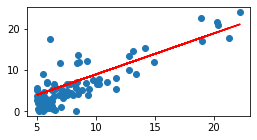

In [5]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(quiz_data[:,0], quiz_data[:,1])

# linha com os valores iniciais dos parametros
pred = theta_1s[0]*quiz_data[:,0] + theta_0s[0]
line, = ax.plot(quiz_data[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = theta_1s[i] * quiz_data[:,0] + theta_0s[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(theta_0s), interval=20, save_count=50)
HTML(ani.to_jshtml())